In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import gym
import gambler_env
from gambler_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
FIG_PATH = 'figures/'

RANDOM_SEED = 17
ENV_NAME = "gambler"

In [3]:
env_small = gambler_env.GamblersEnv(initial_cash_in_hand=5, goal_cash=20)
env_large = gambler_env.GamblersEnv(initial_cash_in_hand=25, goal_cash=100)

# Value Iteration

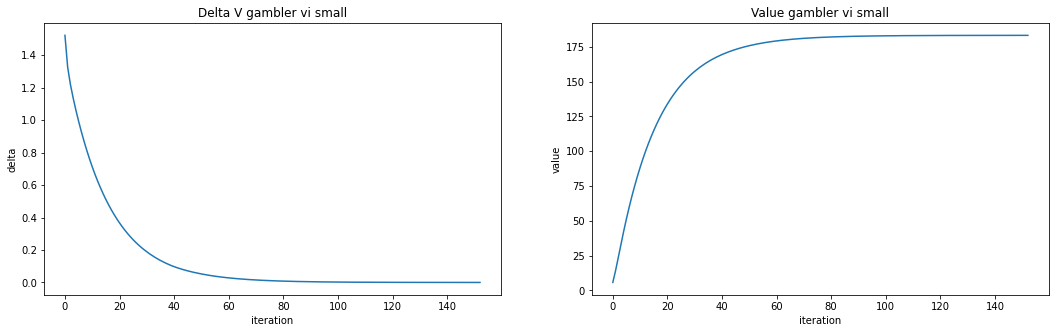

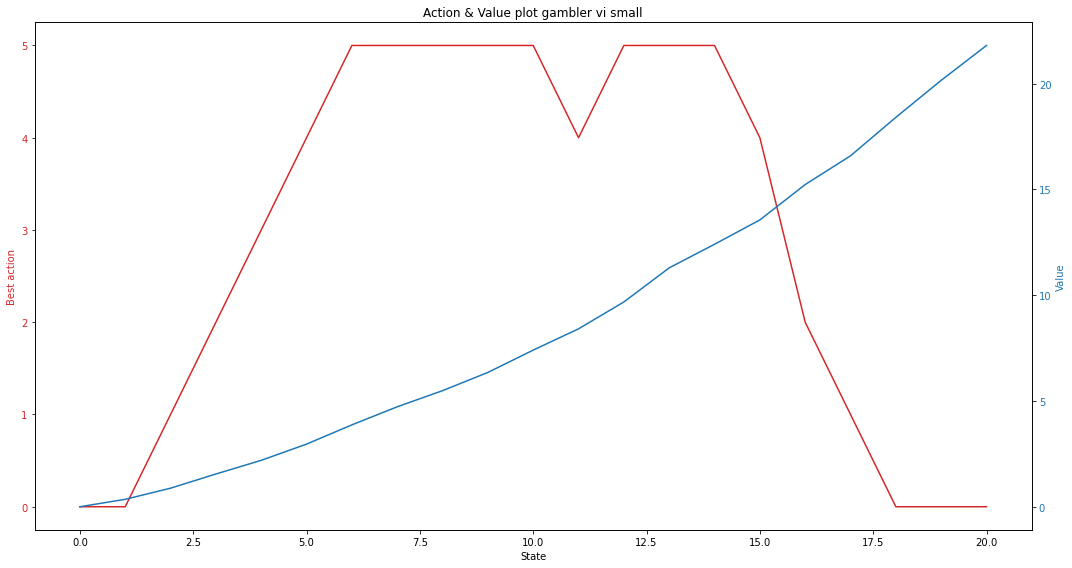

Wall time: 1.39 s


In [4]:
%%time
_, policy_vi_small, stats_vi_small = value_iteration_function(env_small, discount_factor=0.9995, max_iterations=2000, name=ENV_NAME+"_vi_small")

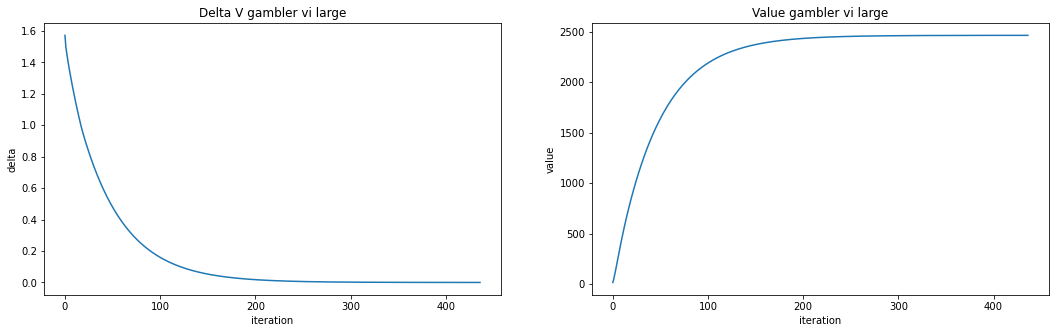

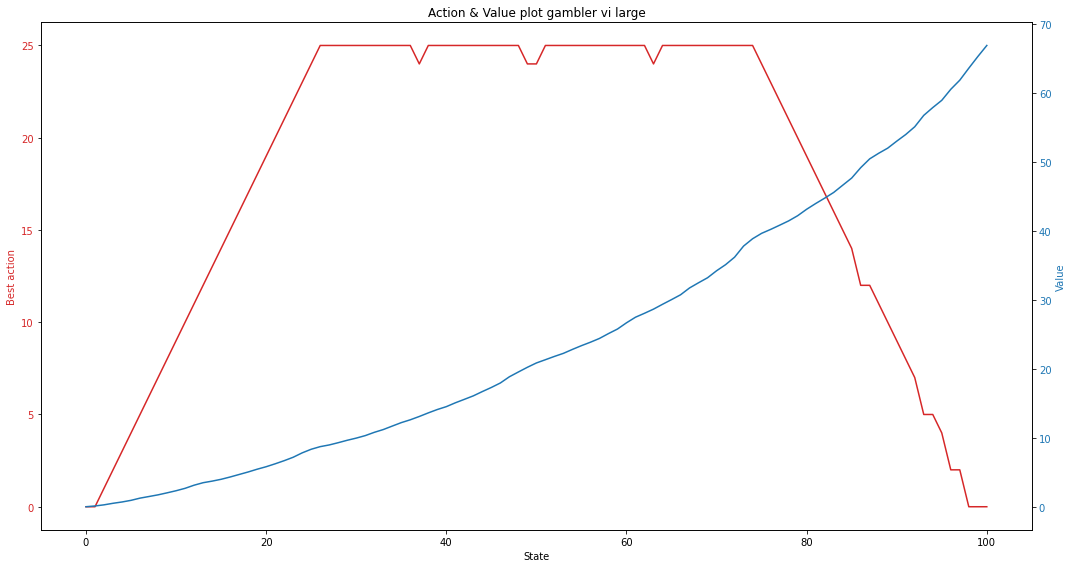

Wall time: 50.5 s


In [5]:
%%time
_, policy_vi_large, stats_vi_large = value_iteration_function(env_large, discount_factor=0.9995, max_iterations=2000, name=ENV_NAME+"_vi_large")

# Policy Iteration

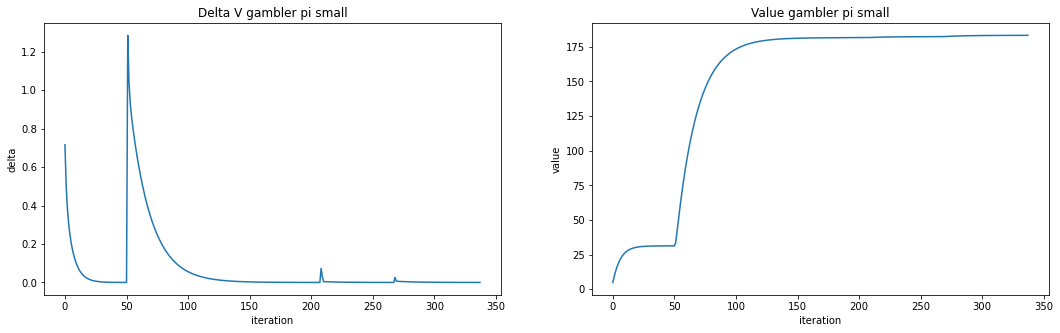

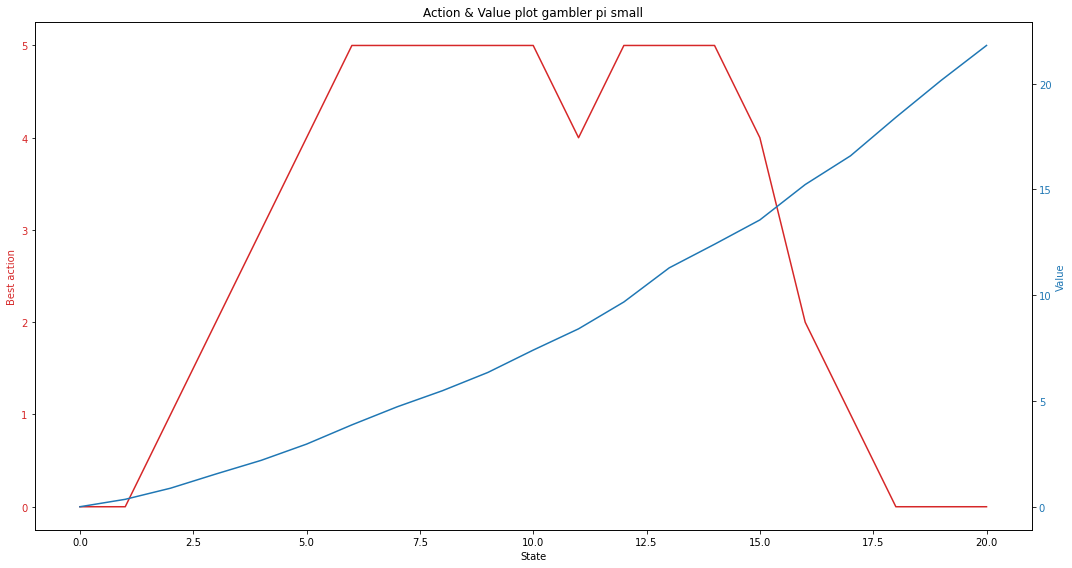

Wall time: 2.15 s


In [6]:
%%time
_, policy_pi_small, stats_pi_small = policy_iteration_function(env_small, discount_factor=0.9995, max_iterations_hl=20, max_iterations_ll=2000, 
                                       name=ENV_NAME+"_pi_small")

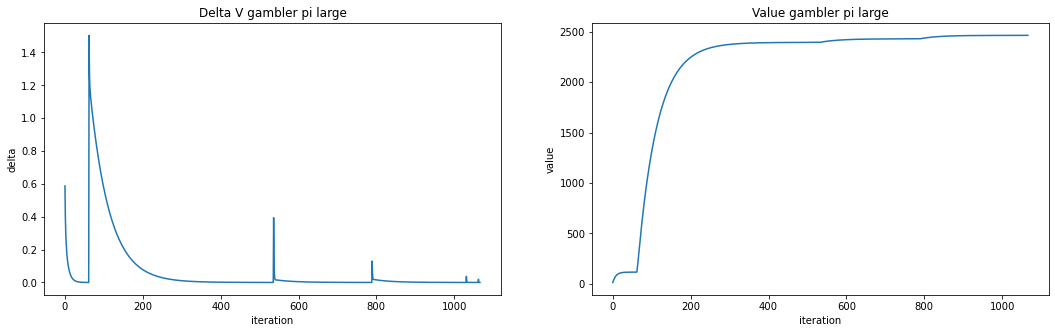

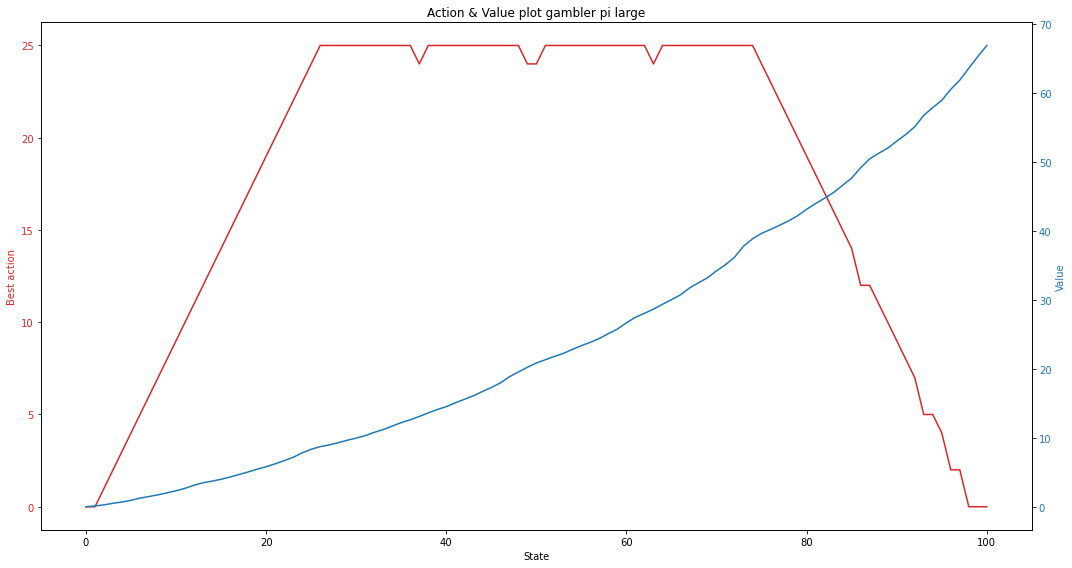

Wall time: 1min 38s


In [7]:
%%time
_, policy_pi_large, stats_pi_large = policy_iteration_function(env_large, discount_factor=0.9995, max_iterations_hl=20, max_iterations_ll=2000, 
                                       name=ENV_NAME+"_pi_large")

# Q-Learning


Episode 3000
average score = 0.5740

Episode 6000
average score = 0.7440

Episode 9000
average score = 0.8720

Episode 12000
average score = 0.8160

Episode 15000
average score = 0.8600

---> finished at episode 15000 in 21.13 seconds
max score: 0.89 at episode 11514 after 14.28s


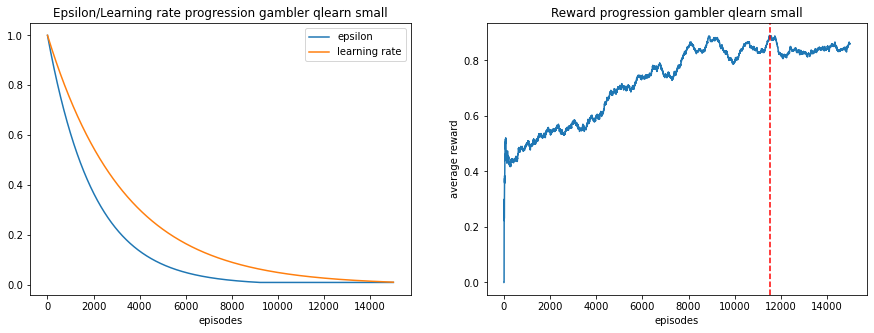

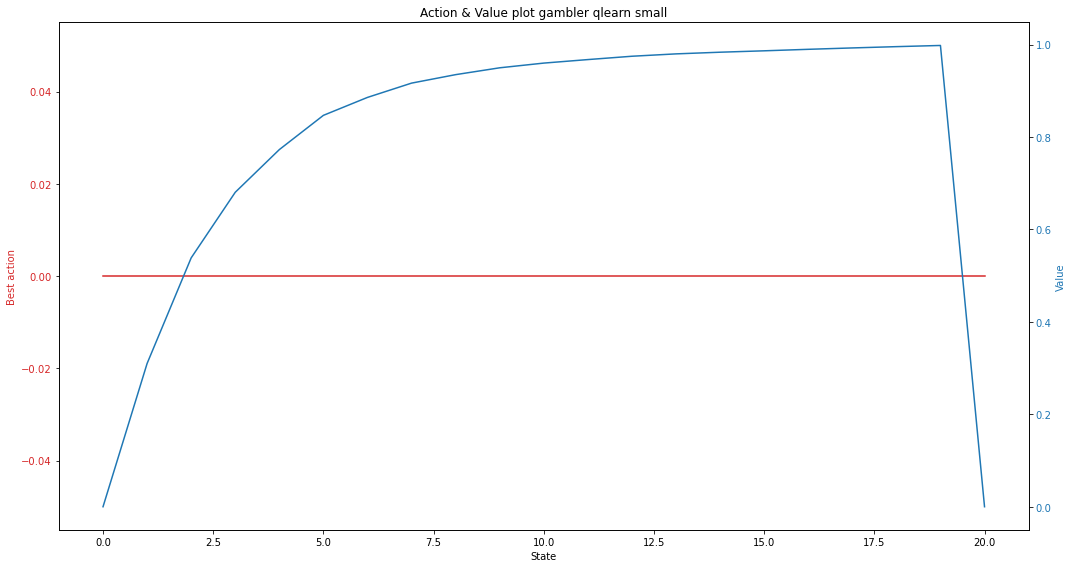

Wall time: 22 s


In [8]:
%%time
_, policy_qlearning_small, stats_ql_small = q_learning_function(env_small, num_episodes=15000, discount_factor=0.9995, 
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_small")


Episode 3000
average score = 0.6300

Episode 6000
average score = 0.7840

Episode 9000
average score = 0.9480

Episode 12000
average score = 0.9700

Episode 15000
average score = 0.9720

---> finished at episode 15000 in 41.10 seconds
max score: 0.972 at episode 14387 after 38.83s


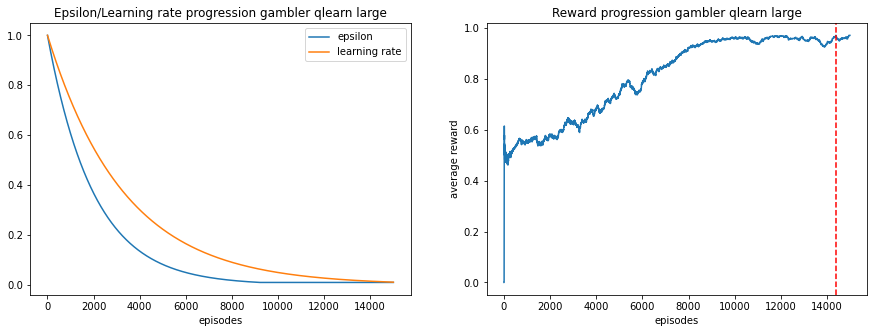

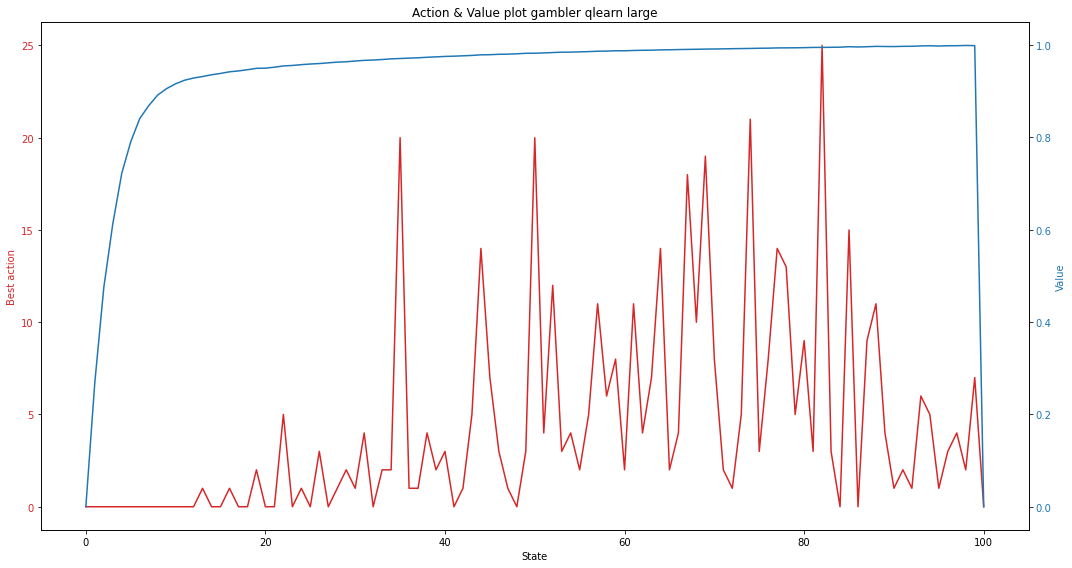

Wall time: 41.9 s


In [9]:
%%time
_, policy_qlearning_large, stats_ql_large = q_learning_function(env_large, num_episodes=15000, discount_factor=0.9995, 
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_large")


Episode 3000
average score = 0.5480

Episode 6000
average score = 0.7380

Episode 9000
average score = 0.8060

Episode 12000
average score = 0.8360

Episode 15000
average score = 0.8280

---> finished at episode 15000 in 20.40 seconds
max score: 0.876 at episode 14366 after 19.26s


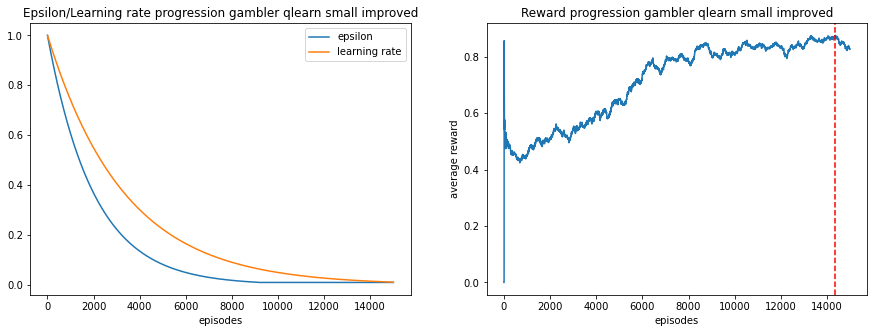

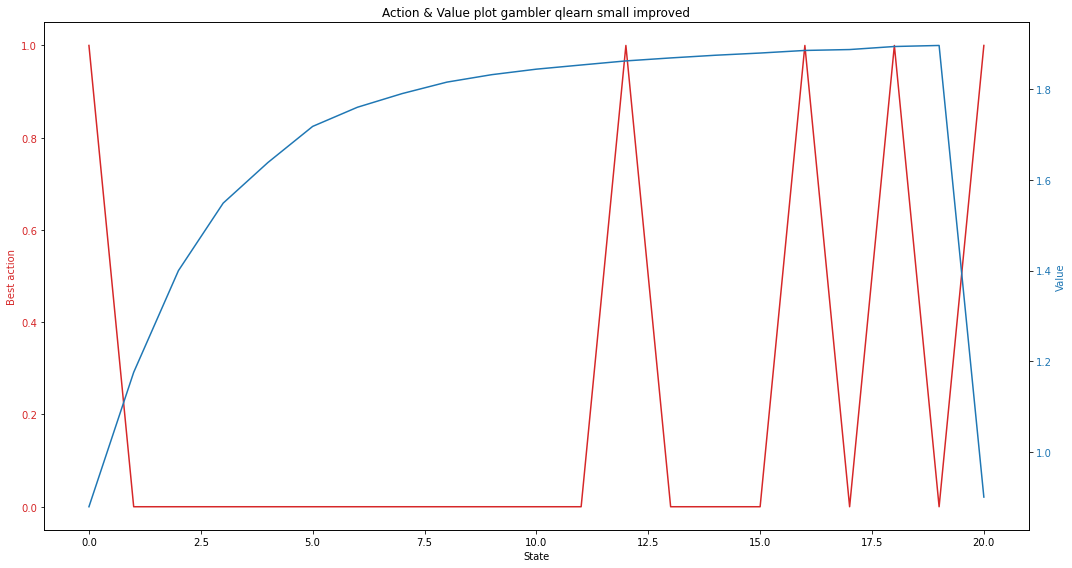

Wall time: 21.2 s


In [10]:
%%time
initial_Q = np.random.uniform(-1, 1, (env_small.nS, env_small.nA))
_, policy_qlearning_small_improved, stats_ql_small_improved = q_learning_function(env_small, num_episodes=15000, discount_factor=0.9995, initial_Q=initial_Q,
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_small_improved")


Episode 3000
average score = 0.5800

Episode 6000
average score = 0.8000

Episode 9000
average score = 0.9400

Episode 12000
average score = 0.9500

Episode 15000
average score = 0.9680

---> finished at episode 15000 in 39.38 seconds
max score: 0.974 at episode 11241 after 26.26s


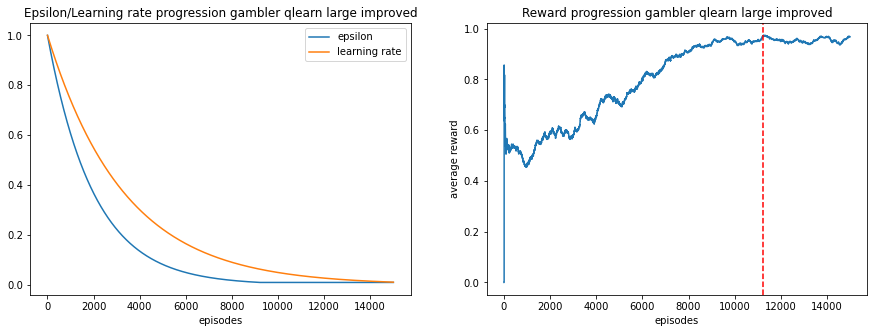

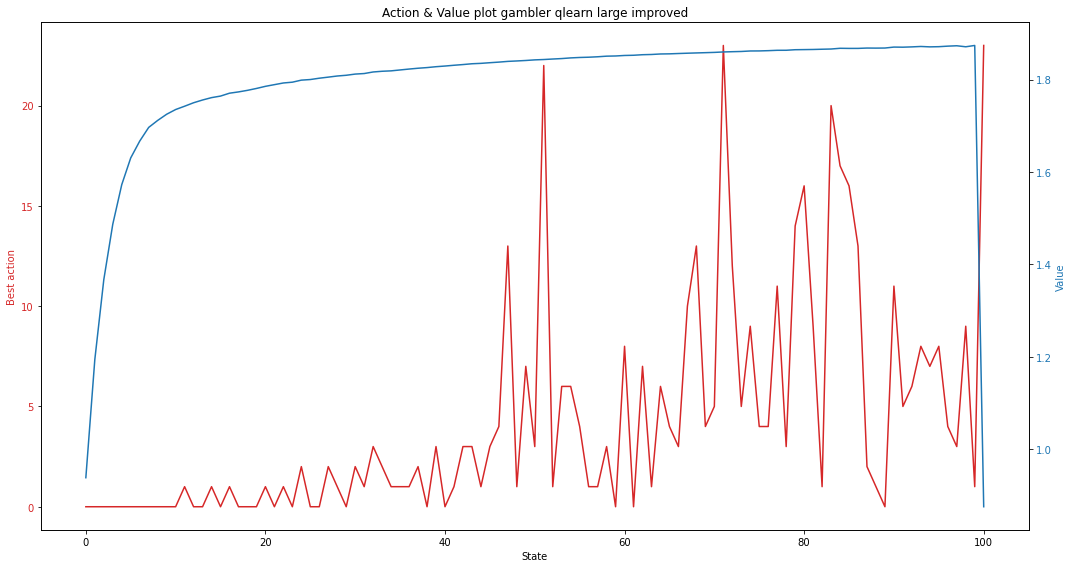

Wall time: 40.2 s


In [11]:
%%time
initial_Q = np.random.uniform(-1, 1, (env_large.nS, env_large.nA))
_, policy_qlearning_large_improved, stats_ql_large_improved = q_learning_function(env_large, num_episodes=15000, discount_factor=0.9995, initial_Q=initial_Q,
                                                                learning_rate_decay=0.9997, epsilon_decay=0.9995, name=ENV_NAME+"_qlearn_large_improved")

# Comparing the 3 algorithms

In [12]:
%%time
stats_final_vi_small = play_function(env_small, policy_vi_small)

Wall time: 1.1 s


In [13]:
%%time
stats_final_vi_large = play_function(env_large, policy_vi_large)

Wall time: 977 ms


In [14]:
%%time
stats_final_pi_small = play_function(env_small, policy_pi_small)

Wall time: 953 ms


In [15]:
%%time
stats_final_pi_large = play_function(env_large, policy_pi_large)

Wall time: 854 ms


In [16]:
%%time
stats_final_ql_small = play_function(env_small, policy_qlearning_small)

Wall time: 14.7 s


In [17]:
%%time
stats_final_ql_large = play_function(env_large, policy_qlearning_large)

Wall time: 25.3 s


### Improved QL

In [18]:
%%time
stats_final_ql_small_improved = play_function(env_small, policy_qlearning_small_improved)

Wall time: 12.7 s


In [19]:
%%time
stats_final_ql_large_improved = play_function(env_large, policy_qlearning_large_improved)

Wall time: 28.1 s


## Regroup stats for analysis

In [20]:
columns = ["VI_small", "VI_large", "PI_small", "PI_large", "QL_small", "QL_small_improved", "QL_large", "QL_large_improved"]
rows_name = ["Iteration/episode convergence", "Running time (s)", "Success rate average", "Success rate std"]
dict_to_df = {"Stats name": rows_name}

for key in columns:
    stats1 = eval(f"stats_{key.lower()}")
    stats2 = eval(f"stats_final_{key.lower()}")
    list_stats = [stats1['max_iteration'], stats1['running_time'], stats2['mean_score'], stats2['std_score']]
    dict_to_df[key] = list_stats

df = pd.DataFrame.from_dict(dict_to_df).round(decimals=2)

In [21]:
df

,Stats name,VI_small,VI_large,PI_small,PI_large,QL_small,QL_small_improved,QL_large,QL_large_improved
0,Iteration/episode convergence,152.00,436.00,337.00,1066.00,11514.00,14366.00,14387.00,11241.00
1,Running time (s),0.65,49.62,1.42,97.62,14.28,19.26,38.83,26.26
2,Success rate average,41.78,40.50,40.06,41.04,86.84,85.76,99.27,99.78
3,Success rate std,5.24,5.08,4.68,4.94,3.80,3.54,0.86,0.41
